In [50]:
import pandas as pd
import numpy as np

In [10]:
nbeats_pred = pd.read_csv('NBeats_Day3_submission.csv').rename({'Unnamed: 0':'agg_items'}, axis='columns').set_index('agg_items')

In [25]:
lgbm_pred = pd.read_csv('LGBM_model1_submission_test.csv')

In [26]:
lgbm_pred

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_validation,0.689540,0.660080,0.690853,0.635448,0.780287,0.884476,0.858953,0.895674,0.660080,...,0.757973,0.772544,0.850890,0.603253,0.672499,0.549961,0.631294,0.776132,0.882473,0.748373
1,FOODS_1_001_CA_2_validation,0.571401,0.402293,0.202107,0.766530,1.297334,0.664469,0.867107,1.111660,0.402293,...,1.055484,0.722011,1.022164,0.624240,0.455646,0.344703,0.766704,1.297508,0.664643,1.142897
2,FOODS_1_001_CA_3_validation,0.786244,0.744092,0.732335,0.779064,0.876385,1.348898,1.124129,1.227870,0.744092,...,0.978023,1.418535,1.194824,0.869744,0.734568,0.782957,0.783403,0.863529,1.336043,1.338210
3,FOODS_1_001_CA_4_validation,0.019206,-0.181451,-0.151357,-0.144269,-0.014607,0.088647,0.107164,0.115291,-0.181451,...,0.060364,0.139499,0.142724,0.079820,-0.111836,-0.074138,-0.088425,0.041238,0.144491,0.104130
4,FOODS_1_001_TX_1_validation,0.194680,0.285135,0.313958,0.273843,0.331154,0.436130,0.410223,0.213277,0.285135,...,0.294692,0.447380,0.394875,0.196980,0.285708,0.349227,0.241977,0.299288,0.404264,0.021521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,HOUSEHOLD_2_516_TX_2_validation,0.195035,0.196934,0.168133,0.194046,0.287974,0.341159,0.264451,0.227175,0.196934,...,0.282780,0.331089,0.327013,0.197983,0.207020,0.139456,0.194046,0.287974,0.341159,0.224551
30486,HOUSEHOLD_2_516_TX_3_validation,0.172480,0.217693,0.164385,0.153152,0.187326,0.235069,0.243096,0.186713,0.217693,...,0.193362,0.223128,0.231155,0.189513,0.228418,0.181419,0.153152,0.187326,0.235069,0.143652
30487,HOUSEHOLD_2_516_WI_1_validation,0.002237,0.110616,0.157358,0.175117,0.242751,0.178665,0.257515,-0.003526,0.110616,...,0.259494,0.188894,0.266955,0.031008,0.120650,0.144821,0.176582,0.244216,0.177549,0.234651
30488,HOUSEHOLD_2_516_WI_2_validation,0.144512,0.092477,0.105117,0.113519,0.210755,0.161162,0.202539,0.099413,0.092477,...,0.082192,0.114029,0.190857,0.131615,0.091916,0.111604,0.114369,0.189238,0.126561,0.131753


In [ ]:
name_cols = lgbm_pred.id.str.split(pat='_',expand=True)
name_cols['dept_id']=name_cols[0]+'_'+name_cols[1]
name_cols['store_id']=name_cols[3]+'_'+name_cols[4]
name_cols = name_cols.rename(columns={0: "cat_id", 3: "state_id"})
name_cols = name_cols.drop([1,2,4,5],axis=1)
name_cols

In [28]:
lgbm_pred = pd.concat([name_cols,lgbm_pred],axis=1)
lgbm_pred.head()

,cat_id,state_id,dept_id,store_id,id,F1,F2,F3,F4,F5,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS,CA,FOODS_1,CA_1,FOODS_1_001_CA_1_validation,0.689540,0.660080,0.690853,0.635448,0.780287,...,0.757973,0.772544,0.850890,0.603253,0.672499,0.549961,0.631294,0.776132,0.882473,0.748373
1,FOODS,CA,FOODS_1,CA_2,FOODS_1_001_CA_2_validation,0.571401,0.402293,0.202107,0.766530,1.297334,...,1.055484,0.722011,1.022164,0.624240,0.455646,0.344703,0.766704,1.297508,0.664643,1.142897
2,FOODS,CA,FOODS_1,CA_3,FOODS_1_001_CA_3_validation,0.786244,0.744092,0.732335,0.779064,0.876385,...,0.978023,1.418535,1.194824,0.869744,0.734568,0.782957,0.783403,0.863529,1.336043,1.338210
3,FOODS,CA,FOODS_1,CA_4,FOODS_1_001_CA_4_validation,0.019206,-0.181451,-0.151357,-0.144269,-0.014607,...,0.060364,0.139499,0.142724,0.079820,-0.111836,-0.074138,-0.088425,0.041238,0.144491,0.104130
4,FOODS,TX,FOODS_1,TX_1,FOODS_1_001_TX_1_validation,0.194680,0.285135,0.313958,0.273843,0.331154,...,0.294692,0.447380,0.394875,0.196980,0.285708,0.349227,0.241977,0.299288,0.404264,0.021521


## Build aggregates of predictions

In [30]:
# Get column groups
cat_cols = ['id', 'dept_id', 'cat_id',  'store_id', 'state_id']
ts_cols = [col for col in lgbm_pred.columns if col not in cat_cols]
ts_dict = {t: int(t[1:]) for t in ts_cols}

# Describe data
print('  unique forecasts: %i' % lgbm_pred.shape[0])
for col in cat_cols:
    print('   N_unique %s: %i' % (col, lgbm_pred[col].nunique()))

  unique forecasts: 30490
   N_unique id: 30490
   N_unique dept_id: 7
   N_unique cat_id: 3
   N_unique store_id: 10
   N_unique state_id: 3


In [31]:
# 1. All products, all stores, all states (1 series)
all_sales = pd.DataFrame(lgbm_pred[ts_cols].sum()).transpose()
all_sales['id_str'] = 'all'
all_sales = all_sales[ ['id_str'] +  [c for c in all_sales if c not in ['id_str']] ]

In [40]:
# 2. All products by state (3 series)
state_sales = lgbm_pred.groupby('state_id',as_index=False)[ts_cols].sum()
state_sales['id_str'] = state_sales['state_id'] 
state_sales = state_sales[ ['id_str'] +  [c for c in state_sales if c not in ['id_str']] ]
state_sales = state_sales.drop(['state_id'],axis=1)

In [42]:
# 3. All products by store (10 series)
store_sales = lgbm_pred.groupby('store_id',as_index=False)[ts_cols].sum()
store_sales['id_str'] = store_sales['store_id'] 
store_sales = store_sales[ ['id_str'] +  [c for c in store_sales if c not in ['id_str']] ]
store_sales = store_sales.drop(['store_id'],axis=1)

In [43]:
# 4. All products by category (3 series)
cat_sales = lgbm_pred.groupby('cat_id',as_index=False)[ts_cols].sum()
cat_sales['id_str'] = cat_sales['cat_id'] 
cat_sales = cat_sales[ ['id_str'] +  [c for c in cat_sales if c not in ['id_str']] ]
cat_sales = cat_sales.drop(['cat_id'],axis=1)

In [44]:
# 5. All products by department (7 series)
dept_sales = lgbm_pred.groupby('dept_id',as_index=False)[ts_cols].sum()
dept_sales['id_str'] = dept_sales['dept_id'] 
dept_sales = dept_sales[ ['id_str'] +  [c for c in dept_sales if c not in ['id_str']] ]
dept_sales = dept_sales.drop(['dept_id'],axis=1)

In [45]:
lgbm_pred_agg = pd.concat([all_sales,state_sales,store_sales,cat_sales,dept_sales],ignore_index=True)

## Computing Errors

In [54]:
nbeats_pred = nbeats_pred.reset_index()

In [56]:
metrics_df = nbeats_pred[['agg_items']]

## Calculate errors
## CAUTION: nbeats_pred_df is "truth"/actual values in this context
error = ( np.array(lgbm_pred_agg.values[:,1:]) - np.array(nbeats_pred.values[:,1:]) ) 

## Calc RMSSE
successive_diff = np.diff(nbeats_pred.values[:,1:]) ** 2
denom = successive_diff.mean(1)

num = error.mean(1)**2
rmsse = num / denom

metrics_df['rmsse'] = rmsse

## Not so clean Pandas action :-) - supressing warnings for now...
metrics_df['mean_error'] = error.mean(1)
metrics_df['mean_abs_error'] = np.absolute(error).mean(1)

squared_error = error **2
mean_squ_err = np.array(squared_error.mean(1), dtype=np.float64) 

metrics_df['rmse'] = np.sqrt( mean_squ_err )

metrics_df

/ssd003/projects/aieng/public/forecasting_unified/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,agg_items,rmsse,mean_error,mean_abs_error,rmse
0,all,0.006886,434.640027,1763.056165,2207.439465
1,CA,0.010285,246.959943,759.75469,935.720071
2,TX,0.137119,-462.890876,694.869514,825.719622
3,WI,0.085457,-612.763558,1350.675924,1644.747737
4,CA_1,0.011418,-78.552593,221.424509,276.786108
5,CA_2,0.017284,118.314992,311.3349,386.122791
6,CA_3,0.001477,29.883647,366.779877,442.461652
7,CA_4,0.340688,135.602264,193.169295,220.118721
8,TX_1,0.000134,5.047516,167.185966,200.192397
9,TX_2,0.72314,-419.712229,445.381139,532.441444


/ssd003/projects/aieng/public/forecasting_unified/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


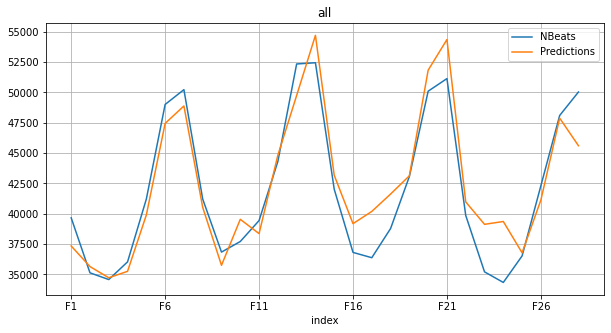

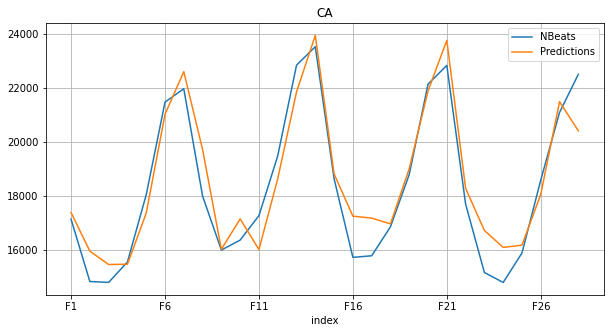

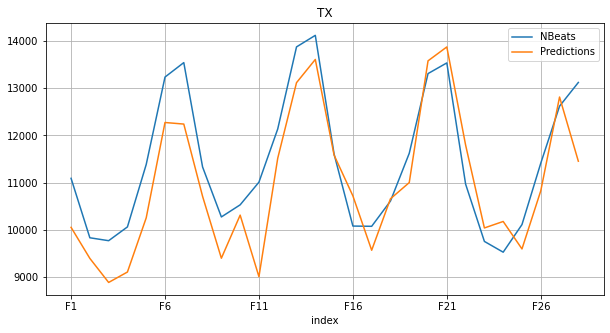

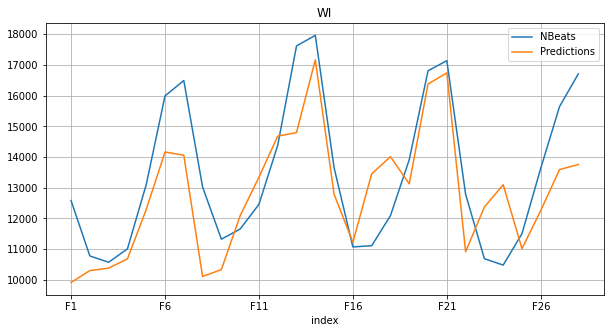

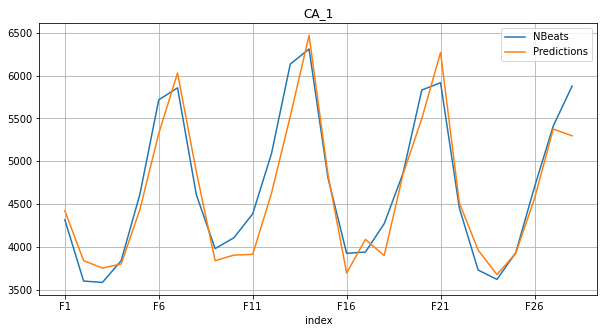

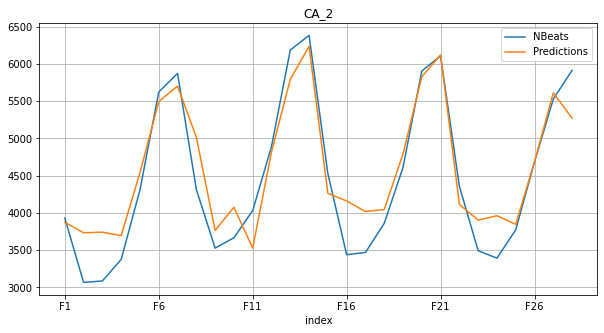

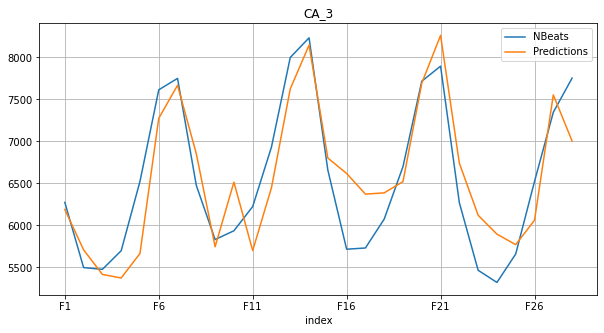

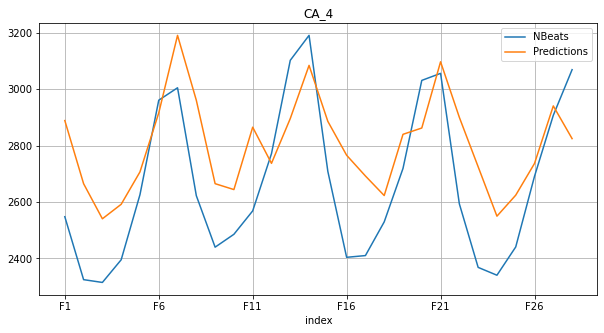

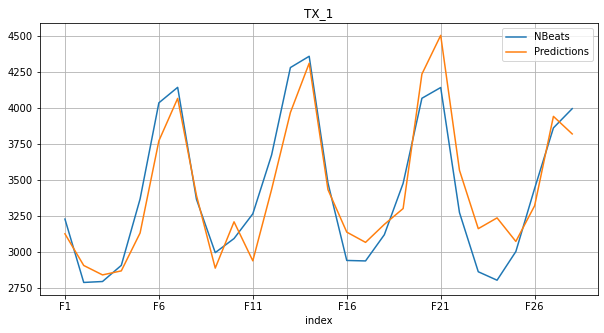

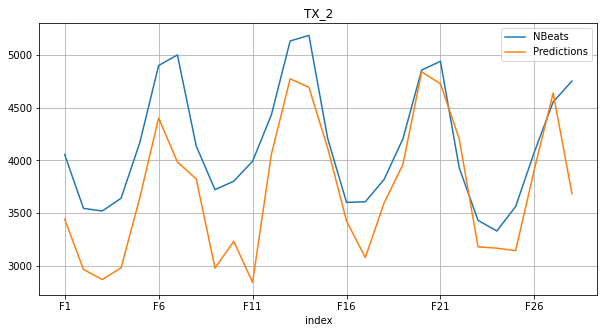

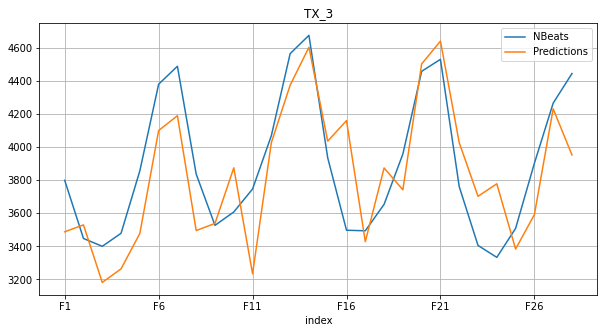

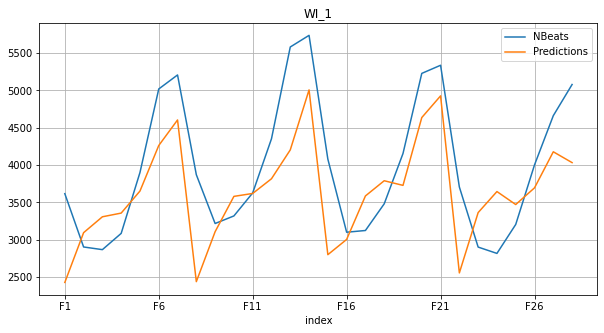

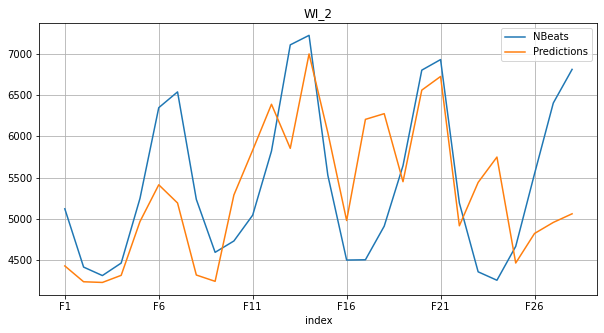

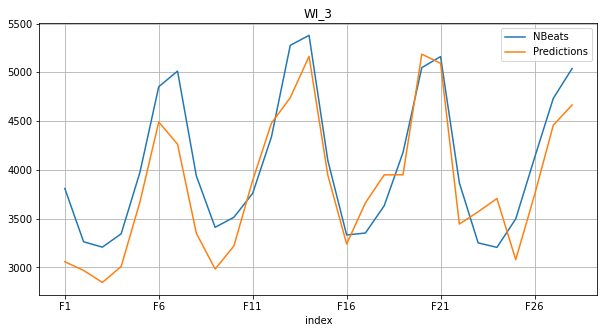

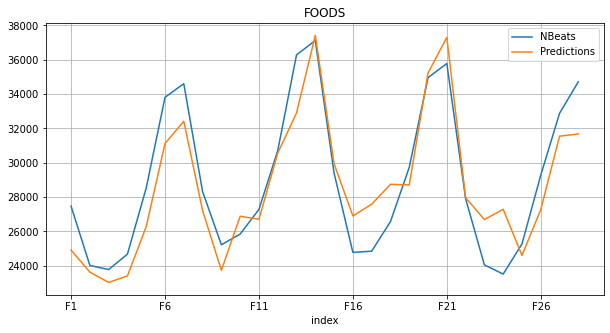

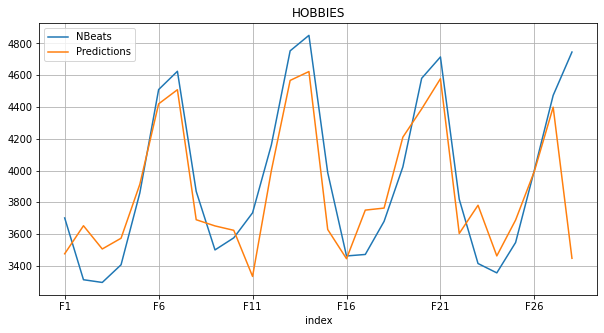

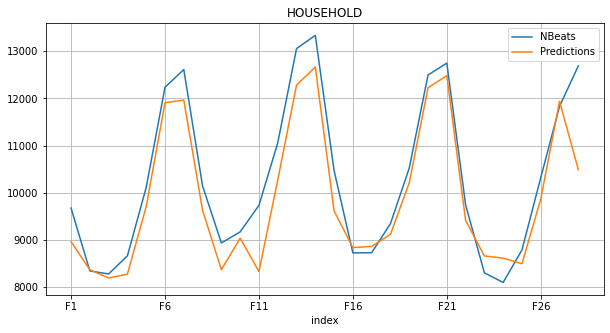

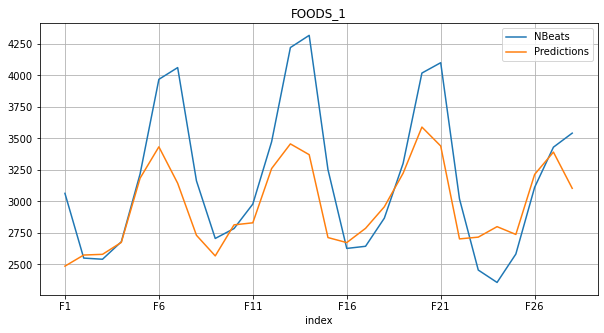

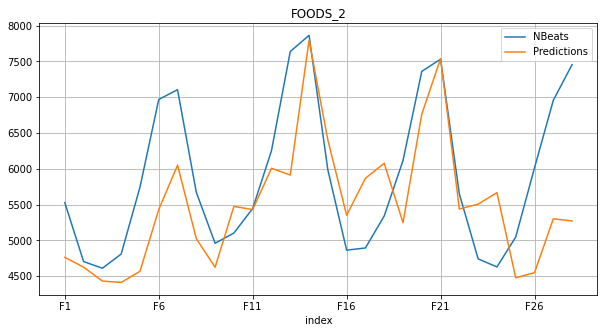

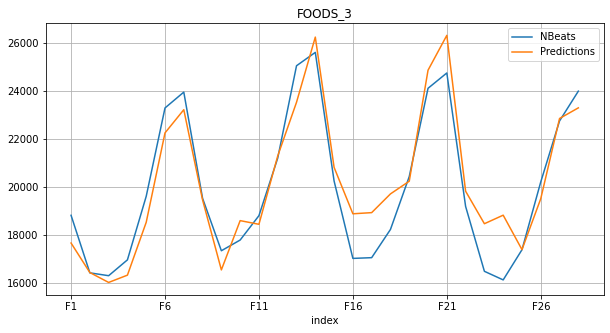

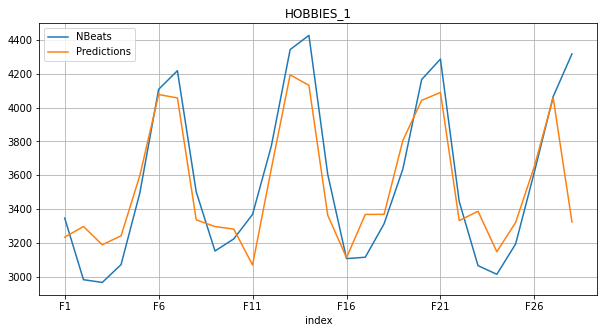

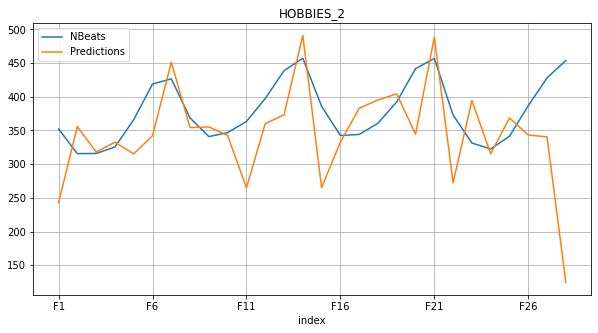

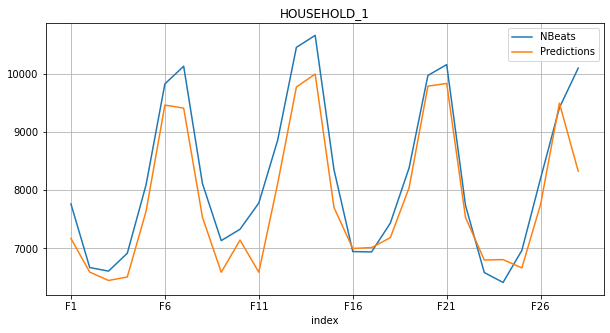

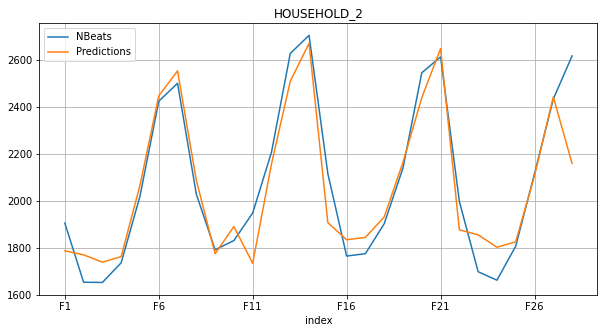

In [70]:
for i in range(0,nbeats_pred.shape[0]):
    plot_df = pd.concat( [nbeats_pred.iloc[i], lgbm_pred_agg.iloc[i] ]  , axis=1, ignore_index=True)
    plot_df = plot_df.iloc[1:,]
    plot_df = plot_df.rename(columns={0:'NBeats',1:'LGBM Agg'})
    plot_df = plot_df.reset_index()
    #plot_df
    
    plot_df[:-1].plot(x='index', y=['NBeats', 'LGBM Agg'] ,figsize=(10,5), grid=True, title=nbeats_pred.iloc[i,0]  )